In [3]:
import numpy as np
import matplotlib.pyplot as plt

import py.twoD.continuum2d as continuum2d

from py.twoD.params2d import setParams
from py.twoD.analysis2d import computeFPs, checkFixPtsStability, a_jkValues, violationType

# This will reload all imports as soon as the code changes
%load_ext autoreload
%autoreload 2 

In [4]:
params=None
c2d = continuum2d.continuum2d()

2d Model initialised.


In [7]:
ee = -0.54
ii = -0.5
params={'I_e': ee, 'I_i': ii, 'end_t': 1*1000, 'sigma_e': 8, 'sigma_i': 15, 'pic_nmb': 25, 'xlength': 50, 'ylength': 50} # , 'n': 6, 'm': 506, 'xlength': 50, 'ylength': 50

ps = setParams(params)
fps = computeFPs(ps)
stab = checkFixPtsStability(fps, ps)
print('fixed points %s ' %str(fps))
print('with (mass) stability %s'  %str(stab))

l=101
k = np.linspace(0,2,l)
kk = [] #np.zeros(int((((N-1)*N)/2)+N))

for idx1 in range(l):
    for idx2 in range(idx1, l):
        kk.append(k[idx1]**2+k[idx2]**2)
kk.sort()
kk = np.array(kk)
a_ee, a_ei, a_ie, a_ii = a_jkValues(fps[list(stab).index(1)], ps)
violation, k0 = violationType(kk, a_ee, a_ei, a_ie, a_ii, ps)
violation

fixed points [[0.0356711  0.08983302]] 
with (mass) stability [1]


0

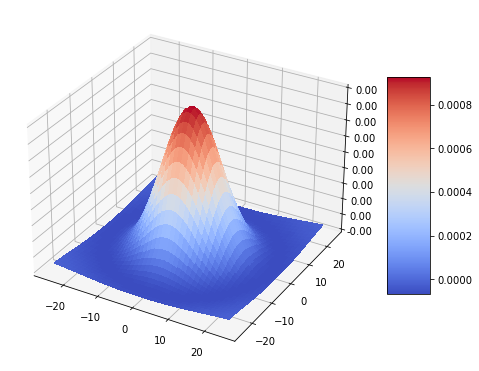

In [8]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator

X = ps.xcoords
Y = ps.ycoords
Z = ps.w_ee*ps.ke - ps.w_ei*ps.ki

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(8,8))
# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
#ax.set_zlim(-.01, 0.01)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [9]:
fp = fps[0]

In [10]:
ue, ui = c2d.run(ps, fp=fp)

ue_init=[[0.0356711 0.0356711 0.0356711 ... 0.0356711 0.0356711 0.0356711]
 [0.0356711 0.0356711 0.0356711 ... 0.0356711 0.0356711 0.0356711]
 [0.0356711 0.0356711 0.0356711 ... 0.0356711 0.0356711 0.0356711]
 ...
 [0.0356711 0.0356711 0.0356711 ... 0.0356711 0.0356711 0.0356711]
 [0.0356711 0.0356711 0.0356711 ... 0.0356711 0.0356711 0.0356711]
 [0.0356711 0.0356711 0.0356711 ... 0.0356711 0.0356711 0.0356711]]
Round t=400
Round t=800
Round t=1200
Round t=1600
Round t=2000
Round t=2400
Round t=2800
Round t=3200
Round t=3600
Round t=4000
Round t=4400
Round t=4800
Round t=5200
Round t=5600
Round t=6000
Round t=6400
Round t=6800
Round t=7200
Round t=7600
Round t=8000
Round t=8400
Round t=8800
Round t=9200
Round t=9600
Round t=10000


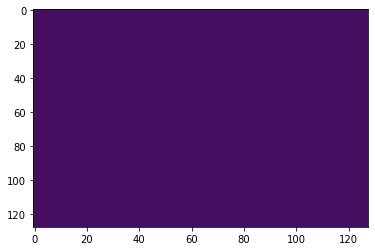

1


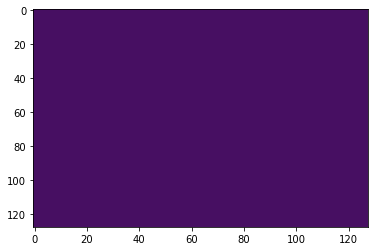

2


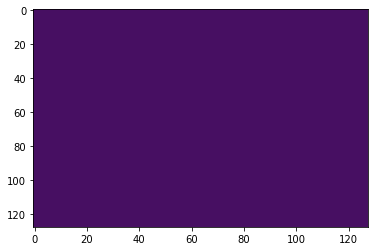

3


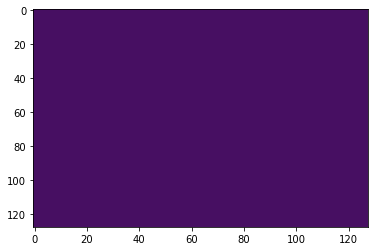

4


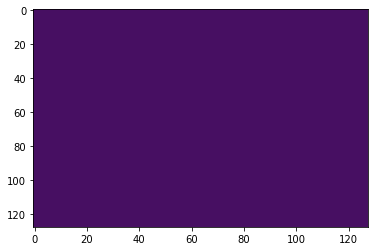

5


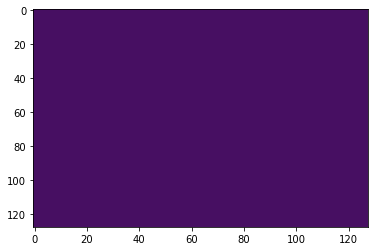

6


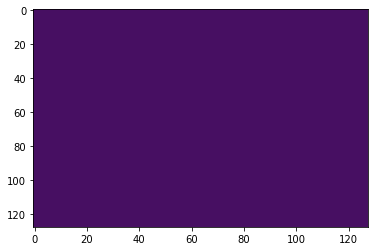

7


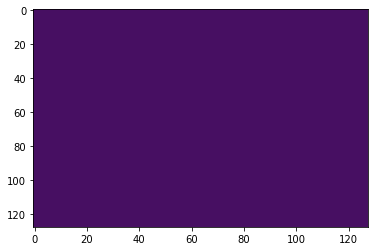

8


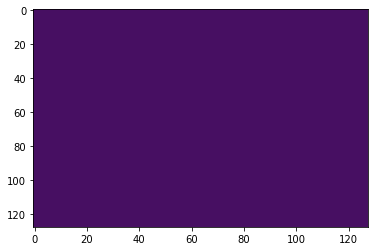

9


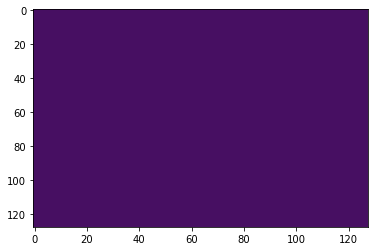

10


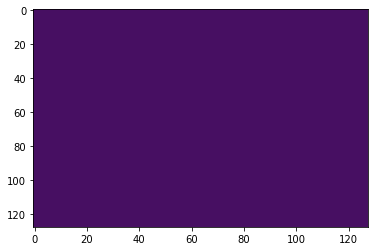

11


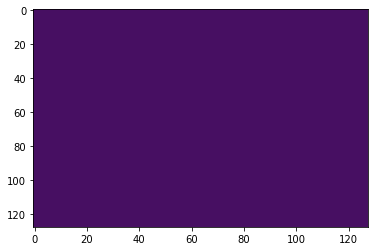

12


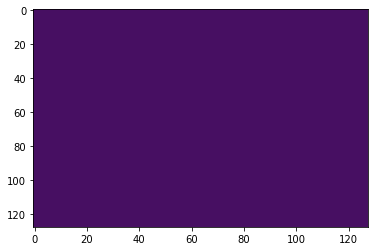

13


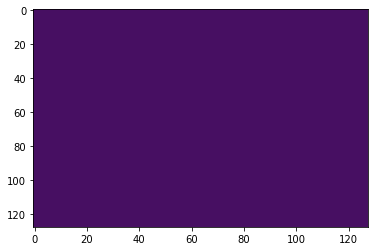

14


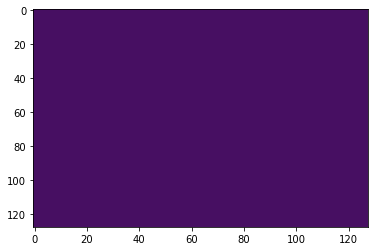

15


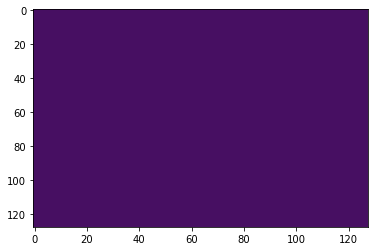

16


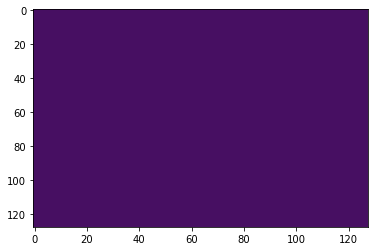

17


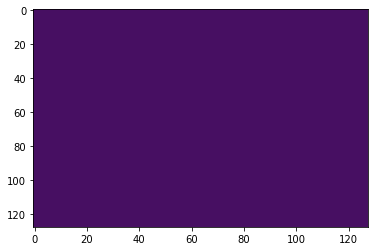

18


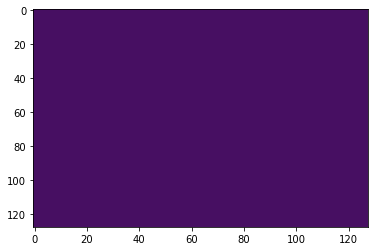

19


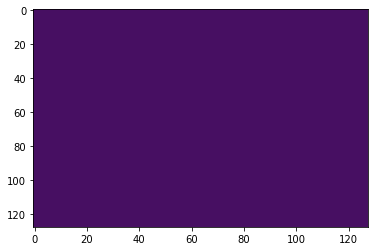

20


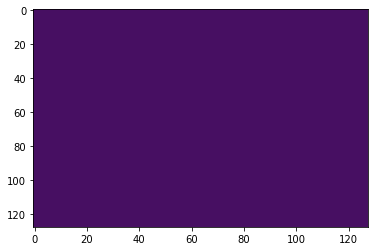

21


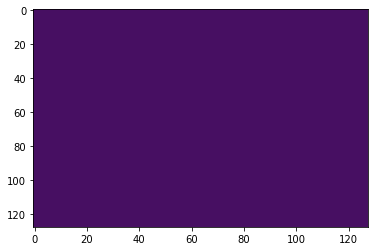

22


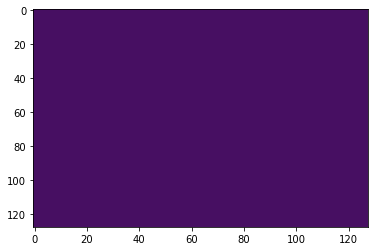

23


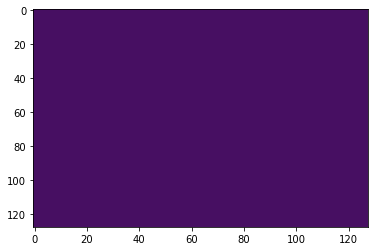

24


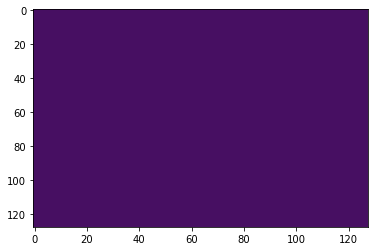

25


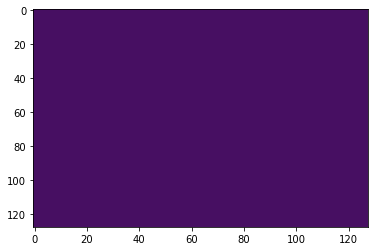

26


In [11]:
count = 0
for array in ue:
    plt.imshow(array.T, vmin=0, vmax=1, aspect='auto')
    plt.show()
    count+=1
    print(count)

/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_1575/405550202.py:4: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(abs(dark_image_grey_fourier)), cmap='gray')


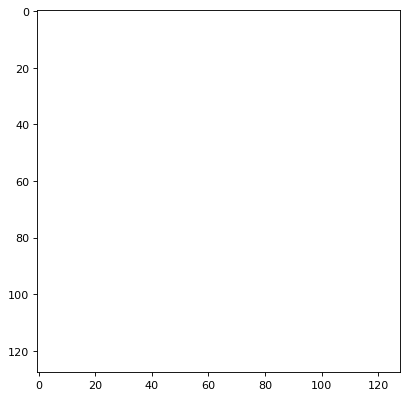

In [16]:
dark_image_grey_fourier = np.fft.fftshift(np.fft.fft2(ue[-1]))
plt.figure(num=None, figsize=(8, 6), dpi=80)
#np.log(abs(dark_image_grey_fourier))
plt.imshow(np.log(abs(dark_image_grey_fourier)), cmap='gray')

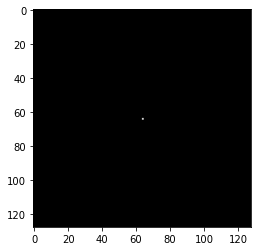

In [13]:
plt.imshow(dark_image_grey_fourier.real, cmap='gray')

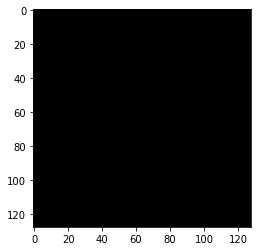

In [14]:
plt.imshow(dark_image_grey_fourier.imag, cmap='gray')

In [15]:
a = np.log(abs(dark_image_grey_fourier))

/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_1575/946822697.py:1: RuntimeWarning: divide by zero encountered in log
  a = np.log(abs(dark_image_grey_fourier))


In [166]:
import math as mt
a[np.argwhere(np.isinf(a))] = 0#.astype(int)
#a[np.argwhere(b==1).flatten()]

In [167]:
np.min(a), np.max(a)

(-38.63912677234193, 8.127159466482414)

In [168]:
np.isinf(a.flatten())

array([False, False, False, ..., False, False, False])

In [169]:
np.max(a)-np.min(a)

46.76628623882435

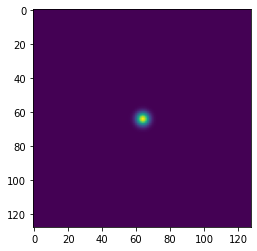

In [90]:
plt.imshow(ps.ke)

Text(0, 0.5, '#pixels y-axis')

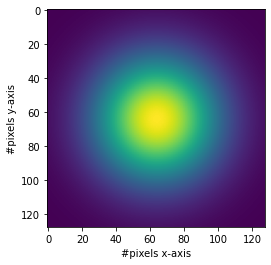

In [91]:
plt.imshow(ps.ki)

plt.xlabel('#pixels x-axis')
plt.ylabel('#pixels y-axis')

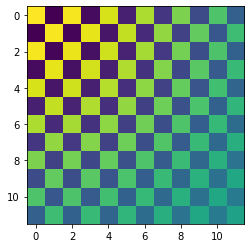

In [92]:
plt.imshow(ps.ke_fft.real[:12, :12])

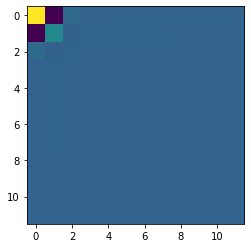

In [93]:
plt.imshow(ps.ki_fft.real[:12, :12])

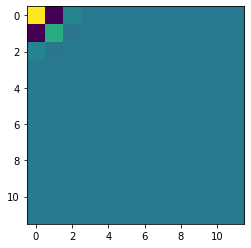

In [65]:
a = ps.w_ee*ps.ke_fft - ps.w_ei*ps.ki_fft
plt.imshow(a.real[:12, :12])

In [94]:
ps.ke_fft

array([[ 1.        +0.j, -0.96891079+0.j,  0.88132314+0.j, ...,
        -0.75258254+0.j,  0.88132314+0.j, -0.96891079+0.j],
       [-0.96891079+0.j,  0.93878812+0.j, -0.8539235 +0.j, ...,
         0.72918534+0.j, -0.8539235 +0.j,  0.93878812+0.j],
       [ 0.88132314+0.j, -0.8539235 +0.j,  0.77673047+0.j, ...,
        -0.6632684 +0.j,  0.77673047+0.j, -0.8539235 +0.j],
       ...,
       [-0.75258254+0.j,  0.72918534+0.j, -0.6632684 +0.j, ...,
         0.56638047+0.j, -0.6632684 +0.j,  0.72918534+0.j],
       [ 0.88132314+0.j, -0.8539235 +0.j,  0.77673047+0.j, ...,
        -0.6632684 +0.j,  0.77673047+0.j, -0.8539235 +0.j],
       [-0.96891079+0.j,  0.93878812+0.j, -0.8539235 +0.j, ...,
         0.72918534+0.j, -0.8539235 +0.j,  0.93878812+0.j]])

In [95]:
ueff, uiff = c2d.run(params, itype='inte_fft', fp=fp)

ue_init=[[0.2602823 0.2602823 0.2602823 ... 0.2602823 0.2602823 0.2602823]
 [0.2602823 0.2602823 0.2602823 ... 0.2602823 0.2602823 0.2602823]
 [0.2602823 0.2602823 0.2602823 ... 0.2602823 0.2602823 0.2602823]
 ...
 [0.2602823 0.2602823 0.2602823 ... 0.2602823 0.2602823 0.2602823]
 [0.2602823 0.2602823 0.2602823 ... 0.2602823 0.2602823 0.2602823]
 [0.2602823 0.2602823 0.2602823 ... 0.2602823 0.2602823 0.2602823]]
Round t=1200
Round t=2400
Round t=3600
Round t=4800
Round t=6000
Round t=7200
Round t=8400
Round t=9600
Round t=10800
Round t=12000


AttributeError: 'list' object has no attribute 'T'

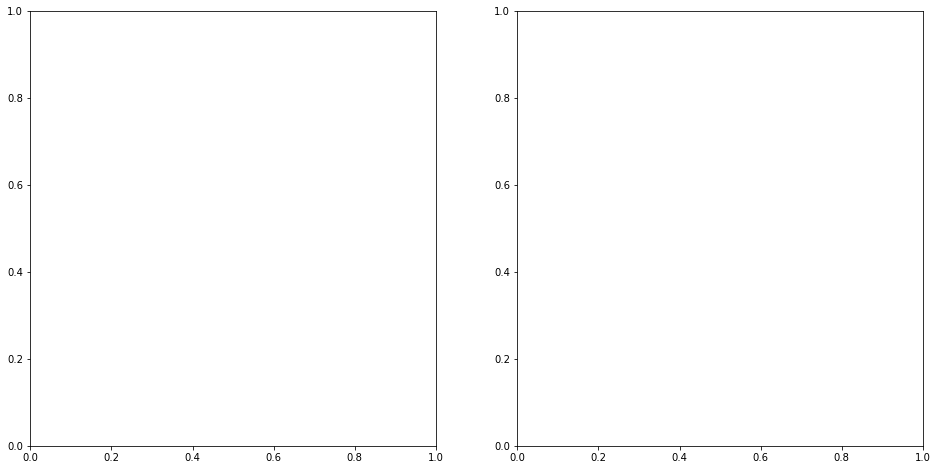

In [64]:
fix, (ax0, ax1) = plt.subplots(1, 2, figsize=(16,8))

ax0.imshow(ue.T, vmin=0, vmax=1, aspect='auto')
ax1.imshow(ueff.T[:,-8000:], vmin=0, vmax=1, aspect='auto')

ax0.set_title(label='integration by approximation')
ax1.set_title(label='integration by fft')

In [ ]:
ueff

In [ ]:
plt.figure(figsize=(10,10))
together_e = ps.w_ee*ps.ke - ps.w_ei*ps.ki
together_i = ps.w_ie*ps.ke - ps.w_ii*ps.ki
zero_line = np.zeros(ps.n)
plt.plot(ps.x, ps.ke, ps.x, ps.ki)
plt.plot(ps.x, together_e)
plt.plot(ps.x, together_i)
plt.plot(ps.x, zero_line, linestyle='dashed', c='black')

# Same setting, different length

In [35]:
params1 = {'I_e': 5.2 , 'I_i': 3.7, 'n': 350, 'length': 20, 'end_t': 500} 
ps1 = setParams(params1)
fps1 = computeFPs(ps1)
stab1 = checkFixPtsStability(fps1, ps1)
print('fixed points %s ' %str(fps1))
print('with (mass) stability %s'  %str(stab1))

fixed points [[1. 1.]] 
with (mass) stability [1]


In [36]:
fp1 = fps1[0]

In [70]:
ue1, ui1 = c1d.run(params1, itype='inte_approxi', fp=fp1)

Summe von ke, bereits normalisiert, also sollte 1 sein 1.0
Summe von ki, bereits normalisiert, also sollte 1 sein 0.9991415684838499


In [71]:
ueff1, uiff1 = c1d.run(params1, itype='inte_fft', fp=fp1)

Summe von ke, bereits normalisiert, also sollte 1 sein 1.0
Summe von ki, bereits normalisiert, also sollte 1 sein 0.9991415684838499


Text(0.5, 1.0, 'integration by fft')

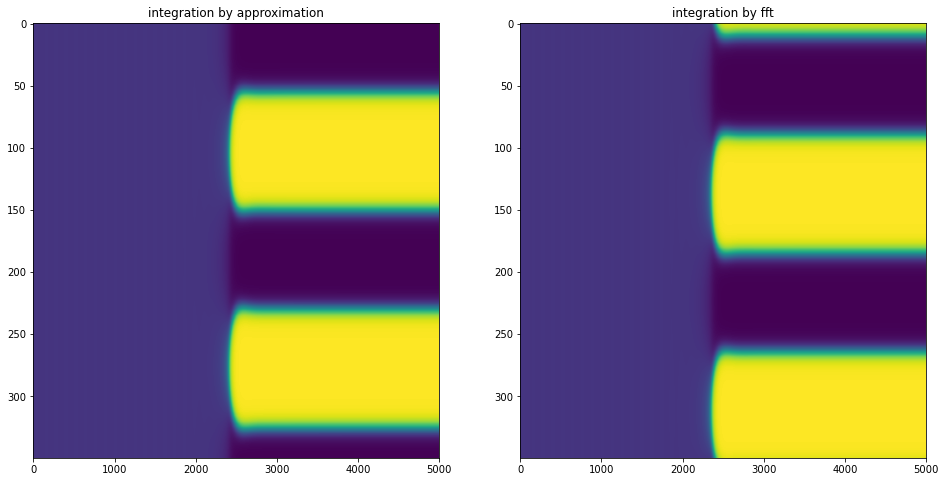

In [72]:
fix, (ax0, ax1) = plt.subplots(1, 2, figsize=(16,8))

ax0.imshow(ue1.T, vmin=0, vmax=1, aspect='auto')
ax1.imshow(ueff1.T, vmin=0, vmax=1, aspect='auto')

ax0.set_title(label='integration by approximation')
ax1.set_title(label='integration by fft')

In [14]:
ue1[-10][0:5], ueff1[-10][0:5]

(array([0.95772056, 0.96679761, 0.97374202, 0.97906705, 0.98316525]),
 array([0.99875221, 0.99875361, 0.99875242, 0.99874861, 0.99874208]))

# Other setting (unstable)

In [15]:
params2 = {'I_e': 2.5, 'I_i': 1.6, 'n': 162, 'length': 10} 
ps2 = setParams(params2)
fps2 = computeFPs(ps2)
stab2 = checkFixPtsStability(fps2, ps2)
print('fixed points %s ' %str(fps2))
print('with (mass) stability %s'  %str(stab2))

Summe von ke, bereits normalisiert, also sollte 1 sein 0.9999994219826178
Summe von ki, bereits normalisiert, also sollte 1 sein 0.9044075964493608
Summe von ke, bereits normalisiert, also sollte 1 sein 0.9999994219826178
Summe von ki, bereits normalisiert, also sollte 1 sein 0.9044075964493608
fixed points [array([0.19052787, 0.16625248])] 
with (mass) stability [0]


In [16]:
fp2 = fps2[0]

In [17]:
ue2, ui2 = c1d.run(params2, itype='inte_approxi')#, fp=fp2)

Summe von ke, bereits normalisiert, also sollte 1 sein 0.9999994219826178
Summe von ki, bereits normalisiert, also sollte 1 sein 0.9044075964493608


In [18]:
ueff2, uiff2 = c1d.run(params2, itype='inte_fft')#, fp=fp2)

Summe von ke, bereits normalisiert, also sollte 1 sein 0.9999994219826178
Summe von ki, bereits normalisiert, also sollte 1 sein 0.9044075964493608


Text(0.5, 1.0, 'integration by fft')

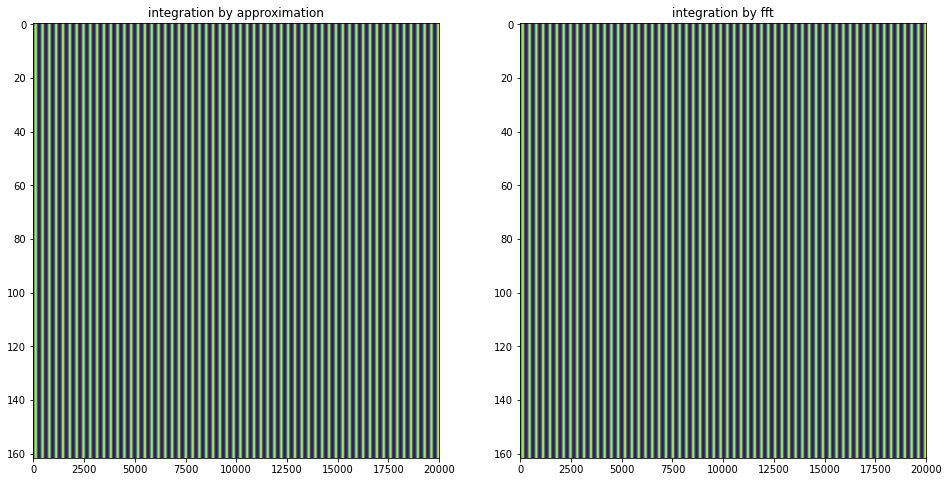

In [19]:
fix, (ax0, ax1) = plt.subplots(1, 2, figsize=(16,8))

ax0.imshow(ue2.T, vmin=0, vmax=1, aspect='auto')
ax1.imshow(ueff2.T, vmin=0, vmax=1, aspect='auto')

ax0.set_title(label='integration by approximation')
ax1.set_title(label='integration by fft')

In [20]:
ue2

array([[0.00165198, 0.00351664, 0.00557534, ..., 0.00930578, 0.00682943,
        0.00304218],
       [0.00471953, 0.00650946, 0.00848557, ..., 0.01206705, 0.00968989,
        0.00605419],
       [0.00777636, 0.00949454, 0.01139136, ..., 0.01482983, 0.0125479 ,
        0.00905768],
       ...,
       [0.90915046, 0.90915046, 0.90915046, ..., 0.90915046, 0.90915046,
        0.90915046],
       [0.90681107, 0.90681107, 0.90681107, ..., 0.90681107, 0.90681107,
        0.90681107],
       [0.90430707, 0.90430707, 0.90430707, ..., 0.90430707, 0.90430707,
        0.90430707]])

# Harris PhD Setting (as close as possible at least)

In [115]:
params_h={'tau_e': 1, 'tau_i': 0.1,
        'w_ee': 1, 'w_ei': 1.5, 'w_ie': 1, 'w_ii': 0.25,
        'sigma_e': 1, 'sigma_i': 3, 'kernel': 'gaussian', 
        'mu_e': 0, 'mu_i': 0, 'beta_e': 50, 'beta_i': 50,
        'I_e': -0.1, 'I_i': -0.4,
        'dt': 0.1, 'start_t': 0, 'end_t': 500, 
        'n': 812, 'length': 60}

In [116]:
ps_h = setParams(params_h)
fps_h = computeFPs(ps_h)
stab_h = checkFixPtsStability(fps_h, ps)
print('fixed points %s ' %str(fps_h))
print('with (mass) stability %s'  %str(stab_h))

fixed points [[1.23241817e-02 3.81703853e-09]
 [3.14558007e-02 9.93427119e-09]
 [4.31367027e-01 2.24595030e-01]] 
with (mass) stability [1, 0, 1]


In [117]:
fp_h = fps_h[2]

In [118]:
ue_harris, ui_harris = c1d.run(params_h, itype='inte_approxi', fp=fp_h)

In [119]:
ueff_harris, uiff_harris = c1d.run(params_h, itype='inte_fft', fp=fp_h)

Text(0.5, 1.0, 'harris: integration by fft')

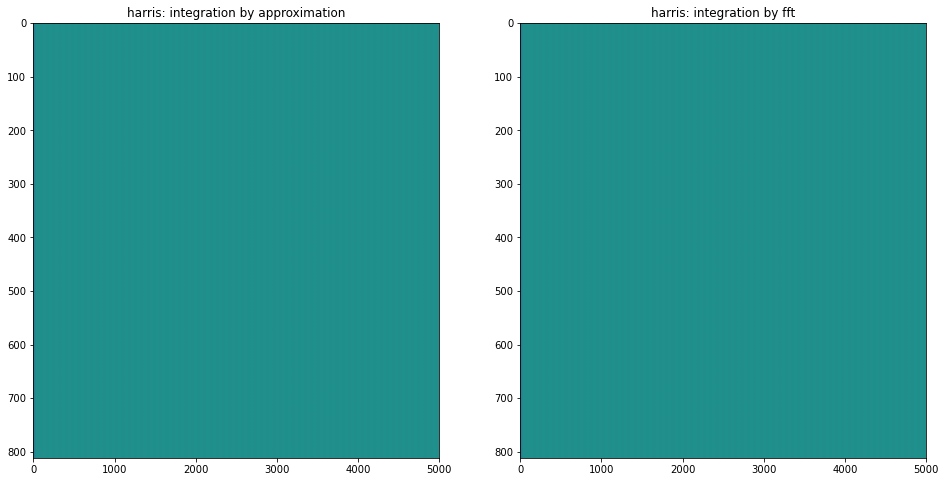

In [121]:
fix, (ax0, ax1) = plt.subplots(1, 2, figsize=(16,8))

ax0.imshow(ue_harris.T, vmin=0, vmax=1, aspect='auto')
ax1.imshow(ueff_harris.T, vmin=0, vmax=1, aspect='auto')

ax0.set_title(label='harris: integration by approximation')
ax1.set_title(label='harris: integration by fft')

In [113]:
ue_harris.T[10]

array([0.43136703, 0.43136703, 0.43136703, ..., 0.52631578, 0.47368421,
       0.52631578])